In [1]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cu113.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cu113.html
     |████████████████████████████████| 7.9 MB 14.9 MB/s 
     |████████████████████████████████| 3.5 MB 53.2 MB/s 
     |████████████████████████████████| 2.4 MB 58.7 MB/s 
     |████████████████████████████████| 709 kB 50.4 MB/s 
     |████████████████████████████████| 467 kB 14.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=f9c9f72c9d19a7d10f4c4245cee30a2c17ca7f5ee7c480b15c155c374c48b9f7
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd
data1 = pd.read_csv("/content/drive/MyDrive/products/mapping/nodeidx2asin.csv")
data1

,node idx,asin
0,0,B00902X3L2
1,1,B000FW4BGM
2,2,B001NTYWFQ
3,3,B003DTLNVA
4,4,B00KFTCE28
...,...,...
2449024,2449024,B000002ZI4
2449025,2449025,B006GB2YDS
2449026,2449026,B00CWGM6B6
2449027,2449027,B0069FEPCE


In [5]:
data2 = pd.read_csv("drive/MyDrive/products/mapping/labelidx2productcategory.csv")
data2

,label idx,product category
0,0,Home & Kitchen
1,1,Health & Personal Care
2,2,Beauty
3,3,Sports & Outdoors
4,4,Books
5,5,"Patio, Lawn & Garden"
6,6,Toys & Games
7,7,CDs & Vinyl
8,8,Cell Phones & Accessories
9,9,Grocery & Gourmet Food


In [6]:
import pandas as pd
data3 = pd.read_csv("drive/MyDrive/products/raw/node-label.csv", header = None)
data3.columns = ["node_label"]
data3.insert(0, 'node_num', range(0, len(data3)))
data3

,node_num,node_label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,3
...,...,...
2449024,2449024,7
2449025,2449025,9
2449026,2449026,8
2449027,2449027,2


In [7]:
df = data3.loc[data3['node_label'].isin([0, 5, 21, 25, 26, 37])]
df

,node_num,node_label
0,0,0
6,6,5
19,19,0
20,20,5
24,24,0
...,...,...
2448967,2448967,0
2448968,2448968,5
2448973,2448973,5
2448981,2448981,0


In [8]:
edge = pd.read_csv("drive/MyDrive/products/raw/edge.csv", header = None)
edge = edge.loc[(edge[0].isin(df['node_num'])) & (edge[1].isin(df['node_num']))]
edge

,0,1
0,0,152857
1,0,32104
2,0,23158
3,0,228358
4,0,115556
...,...,...
61858927,1813973,2449013
61858929,1635354,2449013
61858930,1848217,2449013
61858931,803150,2449013


In [9]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(df['node_num'])
G.number_of_nodes()

239895

In [10]:
for i in range(len(edge)):
  G.add_edge(edge.iloc[i, 0], edge.iloc[i, 1])

G.number_of_edges()

5183954

In [11]:
deg0 = []
for node in G.nodes:
    if G.degree[node] < 11:
      deg0.append(node)

len(deg0)

66738

In [12]:
G.remove_nodes_from(deg0)
G.number_of_nodes()


173157

In [13]:
G.number_of_edges()

4913889

In [14]:
data3 = data3.loc[data3['node_num'].isin(G.nodes)]
data3

,node_num,node_label
0,0,0
6,6,5
19,19,0
20,20,5
24,24,0
...,...,...
2448963,2448963,21
2448968,2448968,5
2448973,2448973,5
2448981,2448981,0


In [15]:
from collections import Counter
Counter(list(data3['node_label']))

Counter({0: 86474, 5: 34757, 21: 49312, 25: 2005, 26: 366, 37: 243})

In [16]:
data = pd.read_csv("drive/MyDrive/products/raw/node-feat.csv", header = None)
data.insert(0, 'node_num', range(0, len(data)))
data = data.loc[data['node_num'].isin(G.nodes)].reset_index(drop=True)
data['index'] = data.index
data

,node_num,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,index
0,0,0.031933,-0.195860,0.051996,-0.063349,-0.229868,-0.022130,0.404647,-0.107936,0.032562,...,-0.183108,0.500978,0.402239,0.112249,-0.112690,0.141763,0.076696,-0.392954,-0.064784,0
1,6,-3.851406,0.915849,0.588583,-2.869881,-0.301050,-0.707760,-2.860423,0.595760,-3.044590,...,6.216569,4.410612,-5.241060,4.707540,4.065494,1.922849,3.792605,-2.005674,0.171979,1
2,19,-0.715686,1.180091,0.111302,0.394790,1.037178,1.253486,-1.850752,-0.083145,0.640193,...,1.324988,0.209121,3.656727,-1.831174,-0.398345,1.039561,2.282994,-0.538023,3.674456,2
3,20,-0.140458,1.343894,0.080991,0.484580,-0.219147,-0.362791,-1.492277,-0.323455,-0.237857,...,-0.385152,-0.596324,0.394384,-1.090209,0.279572,-0.144612,0.108497,0.873693,0.392959,3
4,24,0.221811,1.540453,-0.001421,0.802195,0.488764,-0.317437,-0.378551,0.490133,-0.941972,...,-1.339434,-0.297577,1.096097,-1.305360,0.181421,0.843075,0.652916,0.328412,0.433156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173152,2448963,0.358706,0.410029,0.196196,-0.730708,1.228394,-1.913394,-0.330679,-0.395353,-0.454272,...,0.167444,0.998879,1.386599,-0.458722,-0.563959,-0.753562,0.239545,0.346644,-0.134271,173152
173153,2448968,0.304233,0.759097,-0.513060,-0.432246,-0.388382,-0.258686,0.685835,-0.088163,0.282214,...,1.445606,1.209313,2.522159,-0.521700,-0.897451,-0.468812,0.325189,0.184048,1.260547,173153
173154,2448973,-0.112693,-0.071612,0.317602,-0.124570,0.377091,-0.125700,-0.445868,0.236665,-0.621705,...,-0.527512,0.157386,0.084159,0.405155,-0.034151,0.242779,-0.310291,0.159632,0.403024,173154
173155,2448981,0.397849,0.531577,0.690831,-0.407610,0.873174,-0.792346,-0.239473,0.220130,0.079579,...,-0.252390,0.680471,1.196611,-0.450480,-1.109205,0.393501,-0.912733,0.445742,1.473751,173155


In [17]:
x = data.iloc[:, 1:-1].to_numpy()
x.shape

(173157, 100)

In [18]:
dct = {0: 0, 5: 1, 21: 2, 25: 3, 26: 4, 37: 5}
data3 = data3.replace({"node_label": dct})
data3

,node_num,node_label
0,0,0
6,6,1
19,19,0
20,20,1
24,24,0
...,...,...
2448963,2448963,2
2448968,2448968,1
2448973,2448973,1
2448981,2448981,0


In [19]:
y = data3["node_label"].to_numpy()
y.shape

(173157,)

In [20]:
data.index[data['node_num'] == 1813973]

Int64Index([128843], dtype='int64')

In [21]:
edge[0] = edge[0].map(data.set_index('node_num')['index'])
edge[1] = edge[1].map(data.set_index('node_num')['index'])
edge = edge.dropna()
edge = edge.reset_index(drop=True)
edge[0] = edge[0].astype(int)
edge[1] = edge[1].astype(int)
edge

,0,1
0,0,12756
1,0,2690
2,0,1935
3,0,19067
4,0,9605
...,...,...
4913884,128843,173156
4913885,116454,173156
4913886,131255,173156
4913887,58809,173156


In [22]:
edge_index = edge.to_numpy().transpose()
edge_index.shape

(2, 4913889)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter

stratSplit = StratifiedShuffleSplit(test_size=0.3, random_state=42)
stratSplit.get_n_splits(x, y)

for train_idx, test_idx in stratSplit.split(x, y):

    train_x = x[train_idx]
    train_y = y[train_idx]
    
    val_x = x[test_idx]
    val_y = y[test_idx]


print(Counter(train_y))
print(Counter(val_y))

Counter({0: 60531, 2: 34518, 1: 24330, 3: 1404, 4: 256, 5: 170})
Counter({0: 25943, 2: 14794, 1: 10427, 3: 601, 4: 110, 5: 73})


In [24]:
#train_idx = split_idx['train']
from torch_geometric.loader import NeighborSampler
for train_idx, test_idx in stratSplit.split(x, y):
  train_index = train_idx
  test_index = test_idx

In [25]:
import torch
device='cuda:0' if torch.cuda.is_available() else 'cpu'

In [26]:
x = torch.from_numpy(x)
x = x.to(device)
y = torch.from_numpy(y)
y = y.to(device)

train_x = torch.from_numpy(train_x)
train_x = train_x.to(device)
train_y = torch.from_numpy(train_y)
train_y = train_y.to(device)

val_x = torch.from_numpy(val_x)
val_x = val_x.to(device)
val_y = torch.from_numpy(val_y)
val_y = val_y.to(device)

In [27]:
edge_index = torch.from_numpy(edge_index)
edge_index = edge_index.to(device)

In [28]:
train_index = torch.from_numpy(train_index)
train_index = train_index.to(device)

test_index = torch.from_numpy(test_index)
test_index = test_index.to(device)

In [40]:
train_loader = NeighborSampler(edge_index, node_idx=train_index, sizes=[15, 10], batch_size=1024, shuffle=True)

In [41]:
test_loader = NeighborSampler(edge_index, node_idx=test_index, sizes=[15, 10], batch_size=1024, shuffle=True)

In [59]:
## GraphSAGE Model:
import torch
import torch.nn.functional as F
from tqdm import tqdm
from torch_geometric.nn import SAGEConv
import os.path as osp
import pandas as pd
import numpy as np
import collections
from pandas.core.common import flatten

class SAGE(torch.nn.Module):
    def __init__(self, inputs, hidden_layer, outputs, nlayers=2):
        super(SAGE, self).__init__()

        self.convolution_layers = torch.nn.ModuleList()
        self.convolution_layers.append(SAGEConv(inputs, hidden_layer))
        self.nlayers = nlayers

        for _ in range(nlayers - 2):
            self.convolution_layers.append(SAGEConv(hidden_layer, hidden_layer))
        self.convolution_layers.append(SAGEConv(hidden_layer, outputs))

    def reset_parameters(self):
        for conv_layer in self.convolution_layers:
            conv_layer.reset_parameters()

    def forward(self, x, adjs):
        for i, (edge_index, _, size) in enumerate(adjs):
            xs = []
            x_target = x[:size[1]]  
            x = self.convolution_layers[i]((x, x_target), edge_index)
            if i != self.nlayers - 1:
                x = F.relu(x)
                x = F.dropout(x, p=0.5, training=self.training)
            xs.append(x)
            layer_embeddings = [None]*2
            if i < 2: 
                x_all = torch.cat(xs, dim=0)
                layer_embeddings[i] = x_all
              
        return tuple(layer_embeddings)

    def inference(self, x_all):

        total_edges = 0
        for i in range(self.nlayers):
            xs = []
            for batch_size, n_id, adj in train_loader:
                edge_index, _, size = adj.to(device)
                total_edges += edge_index.size(1)
                x = x_all[n_id].to(device)
                x_target = x[:size[1]]
                x = self.convolution_layers[i]((x, x_target), edge_index)
                if i != self.nlayers - 1:
                    x = F.relu(x)
                xs.append(x)


            layer_embeddings = [None]*2
            if i < 2: 
                x_all = torch.cat(xs, dim=0)
                layer_embeddings[i] = x_all
                
        return tuple(layer_embeddings)
    


model = SAGE(inputs = 100, hidden_layer = 256, outputs = 6, nlayers = 2)
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters : {num_params}")

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()

model

Number of parameters : 54534


SAGE(
  (convolution_layers): ModuleList(
    (0): SAGEConv(100, 256, aggr=mean)
    (1): SAGEConv(256, 6, aggr=mean)
  )
)

In [60]:
def training(model, x, y, epochs=100):

    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []

    test_gt =[]
    test_pred = []

    for epoch in range(epochs):

      model.train()
      total_loss = total_correct = 0
      for batch_size, n_id, adjs in train_loader:
          # `adjs` holds a list of `(edge_index, e_id, size)` tuples.
          adjs = [adj.to(device) for adj in adjs]
          optimizer.zero_grad()    
          l1_emb, l2_emb = model(x[n_id].float(), adjs)
          #print("Layer 1 embeddings", l1_emb.shape)
          #print("Layer 2 embeddings", l1_emb.shape)
          out = l2_emb.log_softmax(dim=-1)
          loss = F.nll_loss(out, y[n_id[:batch_size]])
          loss.backward()
          optimizer.step()

          total_loss += float(loss)
          total_correct += int(out.argmax(dim=-1).eq(y[n_id[:batch_size]]).sum())

      train_loss.append(total_loss / len(train_loader))
      train_acc.append(total_correct / train_index.size(0))

      model.eval()

      correct = 0

      for batch_size2, n_id2, adjs2 in test_loader:
        adjs2 = [adj.to(device) for adj in adjs2]
        l1_emb, l2_emb = model(x[n_id2].float().float(), adjs2)
        out = l2_emb 
        y_true = y.cpu().unsqueeze(-1)
        y_pred = out.argmax(dim=-1, keepdim=True)

        correct += int(out.argmax(dim=-1).eq(y[n_id2[:batch_size2]]).sum())

        if epoch == epochs-1:
          a = out.argmax(dim=-1)
          b = y[n_id2[:batch_size2]]
          
          test_gt.extend(list(a.cpu().numpy()))
          test_pred.extend(list(b.cpu().numpy()))


      val_acc.append(correct / test_index.size(0))

      print(f'Epoch: {epoch}, Train Loss: {total_loss}, Train Accuracy: {total_correct / train_index.size(0)}')
      print(f'Epoch: {epoch}, Val Accuracy: {correct / test_index.size(0)}')


    return train_loss,train_acc, val_acc, test_gt, test_pred

In [61]:
train_loss,train_acc, val_acc, test_gt, test_pred = training(model, x, y, epochs=20)

Epoch: 0, Train Loss: 62.82741814851761, Train Accuracy: 0.8319596729615788
Epoch: 0, Val Accuracy: 0.9043081543081543
Epoch: 1, Train Loss: 35.98077429831028, Train Accuracy: 0.9123579932183253
Epoch: 1, Val Accuracy: 0.9225379225379226
Epoch: 2, Train Loss: 31.35732862353325, Train Accuracy: 0.9253850786657757
Epoch: 2, Val Accuracy: 0.9295834295834295
Epoch: 3, Train Loss: 28.875680178403854, Train Accuracy: 0.931688240972205
Epoch: 3, Val Accuracy: 0.9336066836066836
Epoch: 4, Train Loss: 27.362625285983086, Train Accuracy: 0.9349388246747353
Epoch: 4, Val Accuracy: 0.9364171864171864
Epoch: 5, Train Loss: 26.1814144551754, Train Accuracy: 0.9375788926564859
Epoch: 5, Val Accuracy: 0.9387656887656888
Epoch: 6, Train Loss: 25.438930675387383, Train Accuracy: 0.9398064500160879
Epoch: 6, Val Accuracy: 0.9409216909216909
Epoch: 7, Train Loss: 24.66184338927269, Train Accuracy: 0.9415637452664406
Epoch: 7, Val Accuracy: 0.9417109417109417
Epoch: 8, Train Loss: 24.249743774533272, Train

In [62]:
len(test_idx)

51948

In [63]:
len(test_gt)

51948

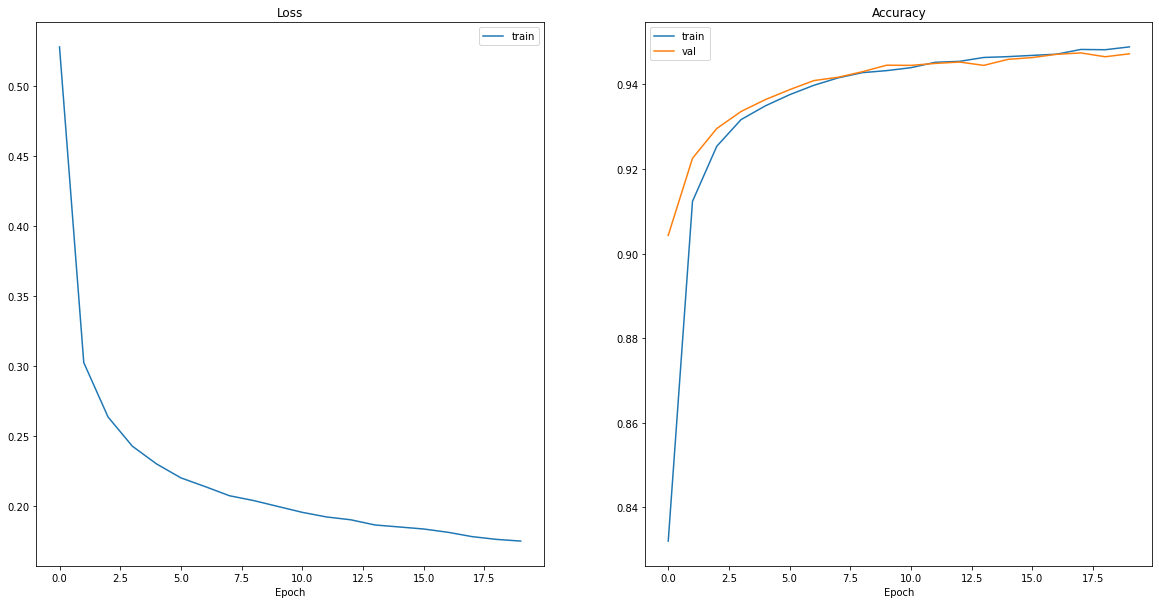

In [64]:
plt.figure(figsize =(20, 10))
ax1 = plt.subplot(121)
ax1.set_title("Loss")
ax1.plot(train_loss, label="train")
plt.xlabel("Epoch")
ax1.legend()

ax2 = plt.subplot(122)
ax2.set_title("Accuracy")
ax2.plot(train_acc, label="train")
ax2.plot(val_acc, label="val")
plt.xlabel("Epoch")
ax2.legend()

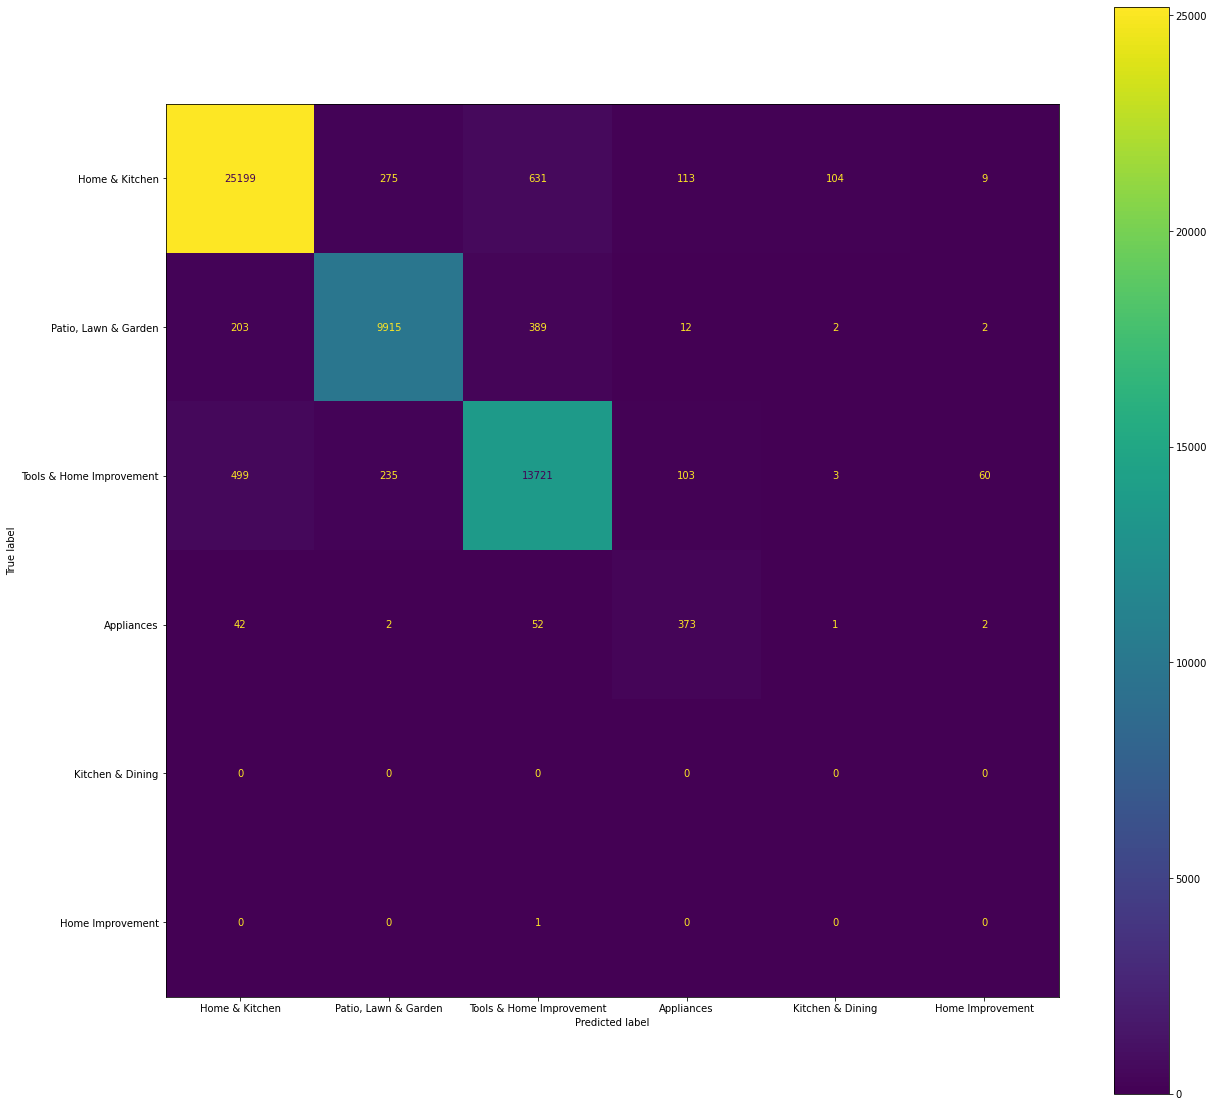

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_gt, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = ['Home & Kitchen', 'Patio, Lawn & Garden', 'Tools & Home Improvement', 'Appliances', 'Kitchen & Dining', 'Home Improvement'])

fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)